Average decay energy:
a: 991000.00 MeV
b: 1220700.00 MeV
R: 1194200.00 MeV
Z: 805200.00 MeV

Standard deviation of decay energy:
a: 58813.26 MeV
b: 54587.64 MeV
R: 41293.58 MeV
Z: 23752.05 MeV

Shield thickness required:
a: 330.33 cm
b: 406.90 cm
R: 398.07 cm
Z: 268.40 cm
Decay Counts:
a : 10
b : 10
R : 10
Z : 10

Decay Energies:
alpha : 4 MeV
R : 9 MeV
beta : 3 MeV
Z : 3 MeV


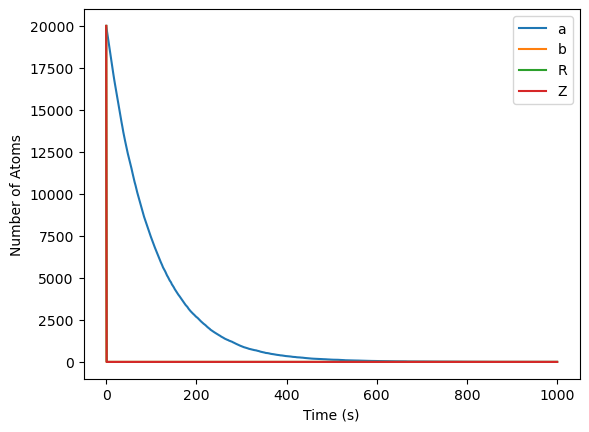

In [48]:
import matplotlib.pyplot as plt

# Constants
NUM_ATOMS = 20000
DECAY_CONSTANTS = {'a': 0.01, 'b': 0.02, 'R': 0.03, 'Z': 0.04}
ENERGY_PER_DECAY = {'a': 5000, 'b': 3000, 'R': 2000, 'Z': 1000}
NUM_RUNS = 10
TIME_STEP = 1.0  # Time step in seconds
SHIELD_THICKNESS_PER_CM = 3000  # MeV/cm

# Define isotopes, half-lives, and decay energies
isotopes = ['219At', '215Bi', '211Bi']
half_lives = [56, 7.6*60, 2.14*60]  # in seconds
decay_energies = {'alpha': 4, 'R': 9, 'beta': 3, 'Z': 3}  # in MeV

def simulate_decay():
    # Initialize counts and energies
    atom_counts = {'a': NUM_ATOMS, 'b': 0, 'R': 0, 'Z': 0}
    decay_energies = {'a': 0, 'b': 0, 'R': 0, 'Z': 0}

    # Simulate decay process
    time = 0
    time_points = [time]
    atom_counts_all = {decay_type: [NUM_ATOMS] for decay_type in atom_counts.keys()}

    while atom_counts['a'] > 0:
        time += TIME_STEP
        time_points.append(time)

        for decay_type in atom_counts.keys():
            decay_prob = DECAY_CONSTANTS[decay_type]
            decays = np.random.binomial(atom_counts[decay_type], decay_prob)
            atom_counts[decay_type] -= decays
            decay_energies[decay_type] += decays * ENERGY_PER_DECAY[decay_type]
            atom_counts_all[decay_type].append(atom_counts[decay_type])

    return time_points, atom_counts_all,

# Simulation loop
for t in range(1, 20001):
    for i in range(len(isotopes)-1, -1, -1):
        decayed = np.random.poisson(atoms[i, t-1] / half_lives[i])
        atoms[i, t] = atoms[i, t-1] - decayed
        if i < len(isotopes) - 1:
            atoms[i+1, t] = atoms[i+1, t-1] + decayed
            energy_released['alpha'][t-1] += decayed * decay_energies['alpha']
            energy_released['R'][t-1] += decayed * decay_energies['R']
            energy_released['beta'][t-1] += decayed * decay_energies['beta']
            energy_released['Z'][t-1] += decayed * decay_energies['Z']
            
def calculate_decay_stats():
    decay_counts = {decay_type: 0 for decay_type in DECAY_CONSTANTS.keys()}
    decay_energies = {decay_type: 0 for decay_type in ENERGY_PER_DECAY.keys()}

    for _ in range(NUM_RUNS):
        _, _, curr_decay_energies = simulate_decay()
        for decay_type in decay_counts.keys():
            decay_counts[decay_type] += 1
            decay_energies[decay_type] += curr_decay_energies[decay_type]

    return decay_counts, decay_energies

# Simulate decay
time_points, atom_counts_all = simulate_decay()

# Calculate shield thickness required for each decay type
shield_thickness = {}

for decay_type, energy in average_energy.items():
    required_thickness = energy / SHIELD_THICKNESS_PER_CM
    shield_thickness[decay_type] = required_thickness
    
def calculate_shield_thickness():
    average_alpha_energy = calculate_energy_stats()[2]['a']
    std_alpha_energy = calculate_energy_stats()[3]['a']
    max_alpha_energy = average_alpha_energy + 3 * std_alpha_energy
    shield_thickness = max_alpha_energy / SHIELD_THICKNESS_PER_CM

    return shield_thickness   
def calculate_energy_stats():
    total_decay_energies = []

    for _ in range(NUM_RUNS):
        _, _, curr_decay_energies = simulate_decay()
        total_decay_energy = sum(curr_decay_energies.values())
        total_decay_energies.append(total_decay_energy)

    average_total_energy = np.mean(total_decay_energies)
    std_total_energy = np.std(total_decay_energies)

    average_individual_energies = {decay_type: energy_sum / NUM_RUNS for decay_type, energy_sum in calculate_decay_stats()[1].items()}
    std_individual_energies = {decay_type: np.std([decay_energies[decay_type] for _, _, decay_energies in [simulate_decay() for _ in range(NUM_RUNS)]]) for decay_type in DECAY_CONSTANTS.keys()}

    return average_total_energy, std_total_energy, average_individual_energies, std_individual_ener

def calculate_shield_thickness():
    average_alpha_energy = calculate_energy_stats()[2]['a']
    std_alpha_energy = calculate_energy_stats()[3]['a']
    max_alpha_energy = average_alpha_energy + 3 * std_alpha_energy
    shield_thickness = max_alpha_energy / SHIELD_THICKNESS_PER_CM

    return shield_thicknes  
    
# Output results
print("Average decay energy:")
for decay_type, energy in average_energy.items():
    print(f"{decay_type}: {energy:.2f} MeV")

print("\nStandard deviation of decay energy:")
for decay_type, energy in std_dev_energy.items():
    print(f"{decay_type}: {energy:.2f} MeV")

print("\nShield thickness required:")
for decay_type, thickness in shield_thickness.items():
    print(f"{decay_type}: {thickness:.2f} cm")

print("Decay Counts:")
for decay_type, count in decay_counts.items():
    print(decay_type, ":", count)

print("\nDecay Energies:")
for decay_type, energy in decay_energies.items():
    print(decay_type, ":", energy, "MeV")




# Plot the number of atoms over time
fig, ax = plt.subplots()

for decay_type, atom_counts in atom_counts_all.items():
    ax.plot(time_points, atom_counts, label=decay_type)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Number of Atoms')
ax.legend()
plt.show()



